# Шаг 1. Импортируйте необходимые библиотеки

In [151]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Шаг 2. Импортируйте набор данных с этого [адреса](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv).

In [152]:
download_url= ("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv")

# Шаг 3. Сохраните его в переменной с именем online_rt.
В случае появления utf-8 decode error, используйте параметр encoding = 'latin1' в pd.read_csv()

In [153]:
online_rt=pd.read_csv(download_url,encoding = 'latin1' )
pd.set_option("display.max.columns", None)
online_rt.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/10 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/10 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/10 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/10 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/10 8:34,1.69,13047.0,United Kingdom


# Шаг 4. Постройте столбчатый график с 10 странами, в которых наибольшее количество 'Quantity' за исключением UK

<AxesSubplot:xlabel='Country'>

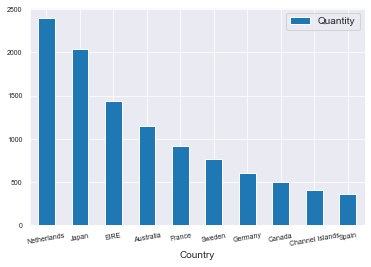

In [154]:
online_rt_wht_uk = online_rt[(online_rt['Country'] != 'United Kingdom')]
sorted_online_rt_wht_uk=online_rt_wht_uk.sort_values(by='Quantity', ascending=False)
sorted_online_rt_wht_uk1= sorted_online_rt_wht_uk.drop_duplicates(subset=['Country'], keep='first')
sorted_online_rt_wht_uk1.head(10) 
sorted_online_rt_wht_uk2=sorted_online_rt_wht_uk1.loc[:(sorted_online_rt_wht_uk == '540785').any(1).idxmax()]
sorted_online_rt_wht_uk2
sorted_online_rt_wht_uk2.plot(x='Country', y="Quantity", kind="bar", rot=10, fontsize=7)

# Шаг 5.  Исключите строки с отрицательным Quantity¶

In [155]:
online_rt_posq= online_rt[(online_rt['Quantity']>=0)]
online_rt_posq

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


# Шаг 6. Постройте точечный график с соотношением Quantity к  UnitPrice для стран 'Netherlands', 'EIRE', 'Germany'


<AxesSubplot:xlabel='UnitPrice', ylabel='Quantity'>

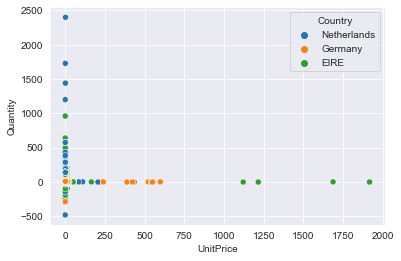

In [156]:
sorted_online_rt=online_rt.loc[online_rt['Country'].isin(['Netherlands', 'EIRE', 'Germany'])]
online_rt_neg
#sorted_online_rt= online_rt_neg.drop_duplicates(subset=['UnitPrice'], keep='first')
#sorted_online_rt.sort_values(by='UnitPrice', ascending=False)
sns.scatterplot(x="UnitPrice", y="Quantity", data=online_rt_neg, hue="Country")

# Шаг 7. Нарисуйте график, который отображает revenue (y) по отношению к UnitPrice (x)

<AxesSubplot:xlabel='UnitPrice'>

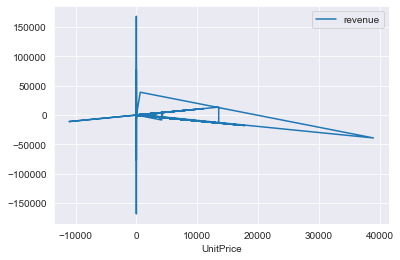

In [157]:
online_rt['revenue'] = online_rt['UnitPrice'] * online_rt['Quantity']
online_rt.plot(x="UnitPrice", y="revenue")